# k-Nearest Neighbors (k-NN)


### Theory


As with other classifiers, the _k_-nearest neighbors (_k_-NN) algorithm takes a training set _D_ in an _m_-dimensional feature space. In _k_-NN, the class membership of a given sample $\mathbf{x}^{(i)}$ is based upon the plurality membership of it _k_-nearest neighbors. This idea can be extended to regression, in which cas the target value of the sample is the average of the target values for its _k_-nearest neighbors.

Naturally, the idea of "neighbor" is based on some notion of distance. Euclidean and Manhattan distance metrics can be used, both of which are special instances of the more general _Minkowski distance_:

$$d(\mathbf{x}^{(i)},\mathbf{x}^{(j)}) = \left(\sum_{k}|x^{(i)}x^{(j)}|^{p}\right)^{\frac{1}{p}}$$

The _k_-NN algorithm is an example of __instance-based learning__. In this paradigm, the construction of the inference model is deferred until classification, when it is then based on a local approximation of the training instances. Like the decision tree and SVM classifiers, _k_-NN classification is non-parametric (i.e. the inference makes no assumption about the underlying parameters of the data). 




### Plotting Utilities

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

       # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
       # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',alpha=1.0, linewidth=1, marker='o',s=55, label='test set')

### Data Import

`iris` dataset from `scikit-learn`

In [2]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target


### Cross-validation Dataset Splitting

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


### Preprocessing

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Classification

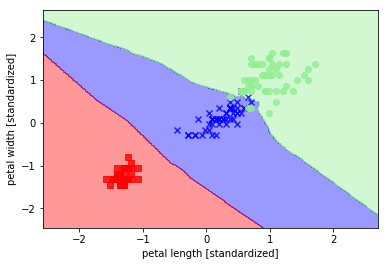

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2,metric='minkowski')
knn.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined,  classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.show()